# MNE : From raw data to epochs and evoked responses (ERF/ERP)

`
Authors:
Alexandre Gramfort
Denis A. Engemann
`

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

First, load the mne package:

In [2]:
import mne

We set the log-level to 'warning' so the output is less verbose

In [3]:
mne.set_log_level('warning')

### Remember if you need help just ask... the machine

In [4]:
mne.pick_types?

## Access raw data

You should have downloaded the `ds000117-practical` folder.

In [5]:
import os

# Change the following path to where the folder ds000117-practical is on your disk
data_path = os.path.expanduser("~/work/data/ds000117-practical/")

raw_fname = os.path.join(data_path,
    'derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif')

In [6]:
print(raw_fname)

/Users/claire/work/data/ds000117-practical/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif


Read data from file:

In [7]:
mne.io.read_raw_fif?

In [8]:
raw = mne.io.read_raw_fif(raw_fname, preload=False)
print(raw)

<Raw  |  sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, n_channels x n_times : 404 x 540100 (491.0 sec), ~7.4 MB, data not loaded>


Note the `preload=False` which states that no data is actually in memory.

For general info on importing MEG see:
https://mne.tools/stable/auto_tutorials/io/plot_10_reading_meg_data.html
or EEG see:
https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html

Now let's look at the measurement info. It will give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.

In [9]:
print(raw.info)

<Info | 27 non-empty fields
    acq_pars : str | 21833 items
    bads : list | 0 items
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 404 items (GRAD: 204, MAG: 102, EEG: 74, STIM: 3, MISC: 12, CHPI: 9)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 36 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 356.3999938964844 Hz
    meas_date : tuple | 1941-03-22 11:04:14 GMT
    meas_id : dict | 4 items
    nchan : int | 404
    proc_history : list | 1 items
    proj_id : ndarray | 1 items
    proj_name : str | 11 items
    projs : list | 0 items
    sfreq : float | 1100.0

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>How many channels do you have for each type of sensors?</li>
    <li>What is the sampling frequency?</li>
    <li>Have the data been filtered?</li>
    <li>What is the frequency of the line noise?</li>
    <li>Is there any bad channel?</li>
    </ul>
</div>

INSERT ANSWERS HERE

raw.info is just a dictionary:

In [10]:
isinstance(raw.info, dict)

True

So we can access its elements this way:

In [11]:
raw.info['sfreq']  # Sampling frequency

1100.0

In [12]:
raw.info['bads']  # list of marked bad channels

[]

Next let's see what channels are present. It is available via the `raw.ch_names` attribute.

In [13]:
raw.ch_names[:10]

['MEG0113',
 'MEG0112',
 'MEG0111',
 'MEG0122',
 'MEG0123',
 'MEG0121',
 'MEG0132',
 'MEG0133',
 'MEG0131',
 'MEG0143']

You can index it as a list

In [14]:
raw.ch_names[42]

'MEG0432'

Channel type of a specific channel

In [15]:
channel_type = mne.io.pick.channel_type(raw.info, 75)
print('Channel #75 is of type:', channel_type)

channel_type = mne.io.pick.channel_type(raw.info, 320)
print('Channel #320 is of type:', channel_type)

Channel #75 is of type: grad
Channel #320 is of type: eeg


Info contains all the details about the sensors (type, locations, coordinate frame etc.)

In [16]:
len(raw.info['chs'])

404

In [17]:
type(raw.info['chs'])

list

In [18]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1,
 'range': 1.9073486328125e-05,
 'cal': 3.250000046861601e-09,
 'coil_type': 3012,
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.01532829,  0.00619847,
        -0.99986327, -0.18597366, -0.98255992, -0.00331254, -0.98243302,
         0.185894  ,  0.016216  ]),
 'unit': 201,
 'unit_mul': 0,
 'ch_name': 'MEG0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [19]:
raw.info['chs'][330]

{'scanno': 331,
 'logno': 25,
 'kind': 2,
 'range': 0.00030517578125,
 'cal': 0.00019999999494757503,
 'coil_type': 1,
 'loc': array([ 5.63842431e-02,  3.68367434e-02,  9.40217227e-02,  8.26010015e-04,
         1.14762366e-01, -2.10680366e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]),
 'unit': 107,
 'unit_mul': 0,
 'ch_name': 'EEG025',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}

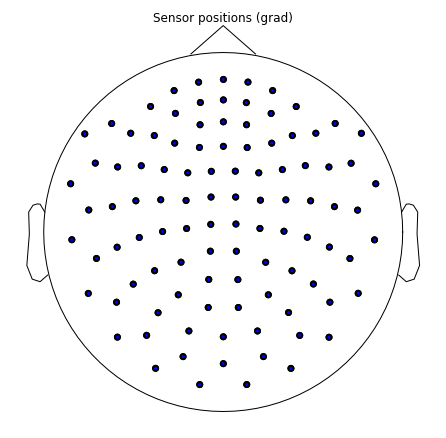

In [20]:
raw.plot_sensors(kind='topomap', ch_type='grad');

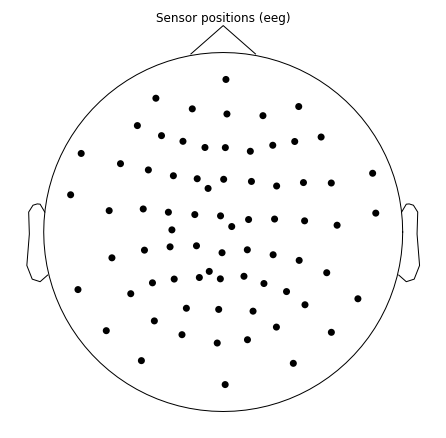

In [21]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

### Setting channel types

Some channels are wrongly defined as EEG in the file. 2 of these are EOG (EEG061 and EEG062) and EEG063 is actually an ECG channel. EEG064 was recording but not connected to anything, so we'll not make it `'misc'`. We will now set the channel types. This will be useful for automatic artifact rejection.

In [22]:
raw.set_channel_types?

In [23]:
raw.set_channel_types({'EEG061': 'eog',
                       'EEG062': 'eog',
                       'EEG063': 'ecg',
                       'EEG064': 'misc'})  # EEG064 free-floating el.

raw.rename_channels({'EEG061': 'EOG061',
                     'EEG062': 'EOG062',
                     'EEG063': 'ECG063'})

## Accessing the data

To access the data just use the [] syntax as to access any element of a list, dict etc.

In [24]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(404, 10)
(10,)


In [26]:
times  # always starts at 0 by convention

array([0.        , 0.00090909, 0.00181818, 0.00272727, 0.00363636,
       0.00454545, 0.00545455, 0.00636364, 0.00727273, 0.00818182])

Note that `raw[]` returns both the data and the times array.

# Resampling the data

We will now change the sampling frequency of the data to speed up the computations.

In [28]:
raw.load_data()  # it is required to load data in memory
raw.resample(300)

<Raw  |  sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, n_channels x n_times : 404 x 147300 (491.0 sec), ~461.4 MB, data loaded>

And let's remove the unecessary channels

In [36]:
raw.drop_channels?

In [43]:
to_drop = ['STI201', 'STI301', 'MISC201', 'MISC202', 'MISC203',
           'MISC204', 'MISC205', 'MISC206', 'MISC301', 'MISC302',
           'MISC303', 'MISC304', 'MISC305', 'MISC306', 'CHPI001',
           'CHPI002', 'CHPI003', 'CHPI004', 'CHPI005', 'CHPI006',
           'CHPI007', 'CHPI008', 'CHPI009', 'EEG064']

In [44]:
raw.drop_channels(to_drop)

<Raw  |  sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, n_channels x n_times : 380 x 147300 (491.0 sec), ~434.4 MB, data loaded>

In [45]:
raw.info

<Info | 27 non-empty fields
    acq_pars : str | 21833 items
    bads : list | 0 items
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 380 items (GRAD: 204, MAG: 102, EEG: 70, EOG: 2, ECG: 1, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 36 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 150.0 Hz
    meas_date : tuple | 1941-03-22 11:04:14 GMT
    meas_id : dict | 4 items
    nchan : int | 380
    proc_history : list | 1 items
    proj_id : ndarray | 1 items
    proj_name : str | 11 items
    projs : list | 0 items
    sfreq : float | 300.0 Hz
    subject_

# Visualizing raw data

See https://mne.tools/0.16/auto_tutorials/plot_visualize_raw.html
for more details.

Let's look at how to:
- browse data
- turn On/Off the PCA/SSP projections
- mark bad segments to obtained annotations
- group channel by types
- group channel by location

In [46]:
raw.plot?

In [47]:
%matplotlib qt

raw.plot();

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>Do you see any bad channel?</li>
    <li>Do you see any bad segment of data?</li>
    <li>Do you see any more then EOG blinks?</li>
    </ul>
</div>

### Filtering

In [48]:
raw.filter?

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>Filter the raw data between 1Hz and 40Hz. Observe the absence of the slow drifts.</li>
    </ul>
</div>

In [49]:
 # TODO

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>Plot the 10 first seconds of stimulation channel just using matplotlib.</li>
    </ul>
</div>

Tips:

- Pick the stim channel using `mne.pick_types`
- Get the data for this channel
- Plot it using `plt.plot`

In [50]:
%matplotlib inline

plt.close('all')

picks = mne.pick_types(raw.info, meg=False, stim=True)
raw.ch_names[picks[0]]

'STI101'

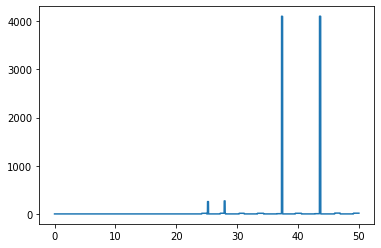

In [51]:
imax = int(raw.info['sfreq'] * 50)
data, times = raw[picks[0], :imax]

plt.plot(times, data.T);

In [52]:
raw.ch_names.index('STI101')

379

## Define and read epochs

First extract events:

In [53]:
events = mne.find_events(raw, stim_channel='STI101', verbose=True)

259 events found
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>What is the type of the variable events?</li>
    <li>What is the meaning of the 3 columnes of events?</li>
    <li>How many events of type 5 do you see?</li>
    </ul>
</div>

Let's visualize the paradigm:

<ipython-input-56-15548b03eb17>:3: RuntimeWarning: More events than colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, raw.info['sfreq']);


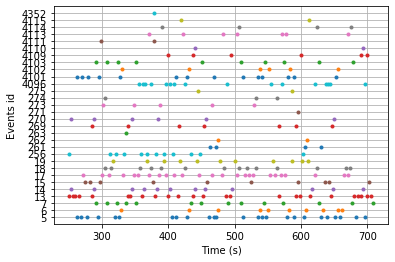

In [56]:
%matplotlib inline

fig = mne.viz.plot_events(events, raw.info['sfreq']);

In [59]:
events = events[events[:, 2] < 20] # take only events with code less than 20

For event trigger and conditions we use a Python dictionary with keys that contain "/" for grouping sub-conditions

In [60]:
event_id = {
    'face/famous/first': 5,
    'face/famous/immediate': 6,
    'face/famous/long': 7,
    'face/unfamiliar/first': 13,
    'face/unfamiliar/immediate': 14,
    'face/unfamiliar/long': 15,
    'scrambled/first': 17,
    'scrambled/immediate': 18,
    'scrambled/long': 19,
}

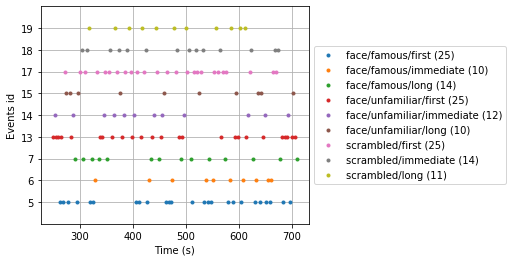

In [62]:
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          event_id=event_id);

In [64]:
%matplotlib notebook
raw.plot(event_id=event_id, events=events);

Define epochs parameters:

In [ ]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

Define the baseline period:

In [ ]:
baseline = (None, 0)  # means from the first instant to t = 0

Define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers and EOG:

In [ ]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

<div class="alert alert-info">
    <b>REMARK</b>:
     <ul>
    <li>The <a href="https://autoreject.github.io/">autoreject</a> project aims to solve this problem of reject parameter setting. See the <a href="https://www.sciencedirect.com/science/article/pii/S1053811917305013">paper</a>.</li>
    </ul>
</div>

In [ ]:
# we are picky again, this time with EOG
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')
# we start by looking at magnetometer and gradiometer signals

Extract epochs:

In [ ]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline,
                    reject=reject)

In [ ]:
print(epochs)

In [ ]:
epochs.drop_bad()  # remove bad epochs based on reject

In [ ]:
epochs.load_data()  # load data in memory

Explore the epochs namespace

Hit ``epochs.<TAB>``

In [ ]:
epochs.

See how epochs were dropped

In [ ]:
%matplotlib inline

epochs.plot_drop_log();

### Visualization Epochs

See [this page](https://mne.tools/stable/auto_tutorials/epochs/plot_visualize_epochs.html) for options on how to visualize epochs.

Here is just an illustration to make a so-called ERP/ERF image:

In [ ]:
%matplotlib qt
raw.plot_psd(fmax=40);

In [ ]:
%matplotlib inline
epochs.plot_image(picks=278, cmap='interactive', sigma=1., vmin=-250, vmax=250)

In [ ]:
import matplotlib.pyplot as plt
plt.close('all')

In [ ]:
%matplotlib qt

epochs.plot()  # Google Summer of code 2015 with Jaakko Leppäkangas

In [ ]:
mne.preprocessing.maxwell_filter?

### The epochs object is your MNE swiss army knife for processing segmented data!

- specialized methods for diagnostic plotting of data
- averaging
- saving
- manipulating data, e.g., rearranging or deleting single trials, resampling

## More diagnostic plotting

In [ ]:
%matplotlib inline
# epochs.drop_bad()
epochs.plot_drop_log();

In [ ]:
for drop_log in epochs.drop_log[:20]:
    print(drop_log)

In [ ]:
epochs.copy().drop(10, reason="I don't like this one").plot_drop_log();

## basic IO 

The standard scenario is saving the epochs into .fif file together with all the header data.

In [ ]:
epochs.save('sample-epo.fif', overwrite=True)  # note that epochs are save in files ending with -epo.fif

In [ ]:
data = epochs.get_data()
data.shape

Scipy also supports reading and writing of matlab files. You can save your single trials with:

In [ ]:
from scipy import io
epochs_data = epochs.get_data()
print(epochs_data.shape)
io.savemat('epochs_data.mat', dict(epochs_data=epochs_data),
           oned_as='row')

### Average the epochs to get ERF/ERP and plot it!

In [ ]:
evoked = epochs.average()
print(evoked)

In [ ]:
%matplotlib qt

evoked.plot();

We can also show sensor position as line color:

In [ ]:
epochs

In [ ]:
%matplotlib inline
evoked.plot(spatial_colors=True);  # note the legend

In [ ]:
epochs['auditory/left'].average().plot(spatial_colors=True);  # note the legend

In [ ]:
epochs['left'].average().plot(spatial_colors=True);  # note the legend

In [ ]:
raw.plot_sensors(ch_type='eeg');

In [ ]:
evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15]);

In [ ]:
evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15]);

In [ ]:
import numpy as np
# pure topography plots called topomap in the MNE jargon
for ch_type in ('mag', 'grad'):
    evoked.plot_topomap(times=np.linspace(0.05, 0.15, 10),
                        ch_type=ch_type);

Topoplot and time series can also be shown in one single plot:

In [ ]:
evoked.plot_joint();

In [ ]:
evoked.plot_joint(times=[0.1]);

## Accessing and indexing epochs by condition

Epochs can be indexed by integers or slices to select a subset of epochs but also with strings to select by conditions `epochs[condition]`

In [ ]:
epochs[0]  # first epoch

In [ ]:
epochs[:10]  # first 10 epochs

In [ ]:
epochs['visual/left']  # epochs for the left visual condition

In [ ]:
# remember ...
event_id

In event_id, "/" selects conditions in a hierarchical way, e.g. here, "auditory" vs. "visual", "left" vs. "right", and MNE can select them individually

In [ ]:
epochs['auditory/left'].average().\
    pick_types(meg='grad').crop(None, 0.2).plot(spatial_colors=True)

In [ ]:
event_id

In [ ]:
epochs['visual']  # epochs for the visual condition (either left or right)

In [ ]:
epochs['left']

To access the data of some epochs use the get_data method.

In [ ]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape

`epochs_data` is a 3D array of dimension (239 epochs, 306 channels, 106 time instants).

Apply this to visualize all the conditions in `event_id`

In [ ]:
for condition in event_id:
    epochs[condition].average().plot_topomap(times=[0.1, 0.15], title=condition);

## Write evoked data to disk

In [ ]:
evoked.save('sample-ave.fif')  # note that the file for evoked ends with -ave.fif

or to write multiple conditions in 1 file

In [ ]:
evokeds_list = [epochs[k].average() for k in event_id]  # get evokeds
mne.write_evokeds('sample-ave.fif', evokeds_list)

### Reading evoked from disk

It is also possible to read evoked data stored in a fif file:

In [ ]:
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(evoked_fname, condition=0, baseline=(None, 0), proj=True)

Or another one stored in the same file:

In [ ]:
evoked2 = mne.read_evokeds(evoked_fname, condition=1,
                           baseline=(None, 0), proj=True)

Or give the explicit name of the averaged condition:

In [ ]:
evoked3 = mne.read_evokeds(evoked_fname, condition='Left Auditory',
                           baseline=(None, 0), proj=True)

**Remark:** Did you notice that you can apply some preprocessing on reading the evokeds from disk?

### Compute a contrast:

In [ ]:
contrast = mne.combine_evoked([evoked1, evoked2], [0.5, -0.5])

Note that this combines evokeds taking into account the number of averaged epochs (to scale the noise variance)

In [ ]:
print(evoked1.nave)  # average of 55 epochs
print(contrast.nave)  # average of 116 epochs

In [ ]:
print(contrast)

In [ ]:
fig = contrast.plot_joint()

### Save your figure as pdf

In [ ]:
%matplotlib qt
import numpy as np
contrast.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag')
plt.savefig('toto.pdf')
!open toto.pdf  # works only on a mac

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Extract Epochs restricted to magnetometers on unfiltered data (sample_audvis_raw.fif)</li>
    <li>Construct epochs with a whole-epoch baseline. Then, filter raw data at 1 Hz, construct epochs from that. Compare the resulting Evokeds (filter vs. baseline)</li>
    <li>Plot the difference between all *visual* and all *auditory* stimulus presentations</li>
    <li>Recompute everything for EEG</li>
    </ul>
</div>

In [ ]:
%matplotlib qt
evoked.plot()

In [ ]:
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)
# get events with find_events
events = mne.find_events(raw)
# define event_id
event_id = {'auditory/left': 1}
# define tmin, tmax, reject
tmin, tmax = -0.2, 0.5
reject = {'eog': 150e-6}
# define baseline or highpass filter data at 1Hz
baseline = (None, 0)
# define picks
picks = mne.pick_types(raw.info, meg='mag', eog=True)
# construct epochs
epochs = mne.Epochs(raw, events, event_id, tmin=tmin, tmax=tmax,
                    reject=reject, picks=picks, baseline=baseline)
# average and plot the evoked
evoked = epochs.average()
evoked.plot();

In [ ]:
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)
# get events with find_events
events = mne.find_events(raw)
# define event_id
event_id = {'auditory/left': 1}
# define tmin, tmax, reject
tmin, tmax = -0.2, 0.5
reject = {'eog': 150e-6}
# define baseline or highpass filter data at 1Hz
#baseline = (None, 0)
raw.load_data()
raw.filter(1, None)
baseline = None
# define picks
picks = mne.pick_types(raw.info, meg='mag', eog=True)
# construct epochs
epochs = mne.Epochs(raw, events, event_id, tmin=tmin, tmax=tmax,
                    reject=reject, picks=picks, baseline=baseline)
# average and plot the evoked
evoked = epochs.average()
evoked.plot()

## ADVANCED: Some Python + MNE Kung Fu to plot selected channels and conditions

In [ ]:
%matplotlib inline

sensor = "MEG 1312"

evokeds = {k:epochs[k].average() for k in event_id}  # funny expression, no? Google "dict comprehension"

for condition, evoked in evokeds.items():  # that's what dictionaries are good for, looping!
    data = evoked.copy().pick_channels([sensor]).data[0]
    plt.plot(evoked.times, data * 1e13, label=condition)

plt.legend(loc="lower left")
plt.ylabel("fT/m")
plt.xlabel("time (s)")
plt.suptitle("MEG at electrode {}".format(sensor));

## ADVANCED: Customize your plots

Want to have every text in blue?

In [ ]:
import matplotlib as mpl
fig = evoked.plot(show=False)  # butterfly plots
fig.subplots_adjust(hspace=1.0)
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(18)
    text.set_color('blue')
for ax in fig.get_axes():
    ax.axvline(0., color='red', linestyle='--')
fig.savefig('plot_erf.pdf');

In [ ]:
%matplotlib qt
mne.viz.plot_evoked_topo([evoked1, evoked2])

In [ ]:
subjects_dir = data_path + '/subjects'
trans_fname = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

maps = mne.make_field_map(evoked, trans=trans_fname, subject='sample',
                          subjects_dir=subjects_dir, n_jobs=1)

# Finally, explore several points in time
field_map = evoked.plot_field(maps, time=.1)